# Importación de librerias

In [ ]:
import requests
import csv
from io import StringIO
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

# Funciones auxiliares

In [ ]:
def imprimir_matriz(matriz):
    print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in reversed(matriz)]))

In [ ]:
def get_data_from_csv(url, resp):
    e = [0]
    s = [0]

    response = requests.get(url)
    if response.status_code == 200:
        data = response.text
        csv_data = StringIO(data)
        lector_csv = csv.reader(csv_data)

        n = int(next(lector_csv)[0])

        for _ in range(n):
            e_i = int(next(lector_csv)[0])
            e.append(e_i)

        for _ in range(n):
            s_i = int(next(lector_csv)[0])
            s.append(s_i)

    return (e, s, resp)


# Importación de datos

In [ ]:
test_cases = {}

In [ ]:
# entrenamiento_# = (esfuerzos, energías, resultado)
test_cases["entrenamiento_3"] = get_data_from_csv(('https://raw.githubusercontent.com/gabokatta/TDA-2C2023/main/TP2/casos_prueba/3.txt'), 7)
test_cases["entrenamiento_10"] = get_data_from_csv(('https://raw.githubusercontent.com/gabokatta/TDA-2C2023/main/TP2/casos_prueba/10.txt'), 380)
test_cases["entrenamiento_10_bis"] = get_data_from_csv(('https://raw.githubusercontent.com/gabokatta/TDA-2C2023/main/TP2/casos_prueba/10_bis.txt'), 523)
test_cases["entrenamiento_10_todo_entreno"] = get_data_from_csv(('https://raw.githubusercontent.com/gabokatta/TDA-2C2023/main/TP2/casos_prueba/10_todo_entreno.txt'), 860)
test_cases["entrenamiento_50"] = get_data_from_csv(('https://raw.githubusercontent.com/gabokatta/TDA-2C2023/main/TP2/casos_prueba/50.txt'), 1870)
test_cases["entrenamiento_50_bis"] = get_data_from_csv(('https://raw.githubusercontent.com/gabokatta/TDA-2C2023/main/TP2/casos_prueba/50_bis.txt'), 2136)
test_cases["entrenamiento_100"] = get_data_from_csv(('https://raw.githubusercontent.com/gabokatta/TDA-2C2023/main/TP2/casos_prueba/100.txt'), 5325)
test_cases["entrenamiento_500"] = get_data_from_csv(('https://raw.githubusercontent.com/gabokatta/TDA-2C2023/main/TP2/casos_prueba/500.txt'), 27158)
test_cases["entrenamiento_1000"] = get_data_from_csv(('https://raw.githubusercontent.com/gabokatta/TDA-2C2023/main/TP2/casos_prueba/1000.txt'), 54021)
test_cases["entrenamiento_5000"] = get_data_from_csv(('https://raw.githubusercontent.com/gabokatta/TDA-2C2023/main/TP2/casos_prueba/5000.txt'), 279175)

# Algoritmo

In [ ]:
def calcular_ganancia_maxima(esfuerzos, energias, dias):
    ganancia = [[0] * (dias) for _ in range(dias)]

    for i in range(1,dias):
        for j in range(1,dias):
          ganancia_entrenando = ganancia[i-1][j-1] + min(energias[j], esfuerzos[i])
          ganancia_descansando = 0 if (i < 2 or j < 2) else ganancia[i-2][j-2] + min(energias[1], esfuerzos[i])
          ganancia[i][j] = max(ganancia_entrenando, ganancia_descansando)
          ganancia[i][1] = max(ganancia[i][1], ganancia_descansando)

    #imprimir_matriz(ganancia)
    return ganancia, max(ganancia[dias-1])

In [ ]:
def plan_entrenamiento(entrenamiento):
    esfuerzos, energias = entrenamiento[0], entrenamiento[1]
    dias = len(energias)
    matriz_ganancia, ganancia_maxima = calcular_ganancia_maxima(esfuerzos, energias, dias)
    plan = []

    i, j = dias-1, np.argmax(matriz_ganancia[dias-1])

    while i > 0:
        plan.append("Entrenar")
        if j != 1:
            i -= 1
            j -= 1
        else:
            i -= 2
            j = np.argmax(matriz_ganancia[i])
            if i >= 0:
              plan.append("Descansar")

    return ganancia_maxima, plan[::-1]


# Pruebas de Optimalidad

In [ ]:
# Aplicamos ordenamientos a casos de prueba de la materia.
for name, test in test_cases.items():
  print(f'Test entrenamiento de {name}\n')
  entrenamiento = (test[0], test[1])
  ganancia, _ = plan_entrenamiento(entrenamiento)
  status_message = "\x1b[32mPASSED\x1b[0m" if test[2] == ganancia else "\x1b[31mFAILED\x1b[0m"
  print(f'EXPECTED: {test[2]} --- RESULT: {ganancia} --- STATUS: {status_message}\n')

  print("-------------------------------------------------------------")

Test entrenamiento de entrenamiento_3

EXPECTED: 7 --- RESULT: 7 --- STATUS: PASSED

-------------------------------------------------------------
Test entrenamiento de entrenamiento_10

EXPECTED: 380 --- RESULT: 380 --- STATUS: PASSED

-------------------------------------------------------------
Test entrenamiento de entrenamiento_10_bis

EXPECTED: 523 --- RESULT: 523 --- STATUS: PASSED

-------------------------------------------------------------
Test entrenamiento de entrenamiento_10_todo_entreno

EXPECTED: 860 --- RESULT: 860 --- STATUS: PASSED

-------------------------------------------------------------
Test entrenamiento de entrenamiento_50

EXPECTED: 1870 --- RESULT: 1870 --- STATUS: PASSED

-------------------------------------------------------------
Test entrenamiento de entrenamiento_50_bis

EXPECTED: 2136 --- RESULT: 2136 --- STATUS: PASSED

-------------------------------------------------------------
Test entrenamiento de entrenamiento_100

EXPECTED: 5325 --- RESULT: 

# Pruebas de Volumen

In [ ]:
# N siendo la cantidad de dias a analizar
def generar_dataset(n):
  random.seed()
  e = [0] + [random.randint(1, 100) for _ in range(n)]
  s = [0] + sorted([random.randint(1, 100) for _ in range(n)], reverse=True)
  return (e, s)

In [ ]:
def prueba_volumen():
    tiempos = []
    n_elementos = list(range(0, 10001, 100))

    for n in tqdm(n_elementos):
      entrenamiento = generar_dataset(n)
      inicio = time.perf_counter()
      plan_entrenamiento(entrenamiento)
      fin = time.perf_counter()
      tiempo_ejecucion = (fin - inicio) * 1000
      tiempos.append(tiempo_ejecucion)

    return n_elementos, tiempos

In [ ]:
# Realiza la prueba de volumen
n_elementos, mediciones = prueba_volumen()

100%|██████████| 101/101 [1:18:53<00:00, 46.87s/it] 


In [ ]:
max(mediciones)

137794.28074499994

In [ ]:
factor_de_escala = max(mediciones) / (max(n_elementos) ** 2)
n_cuadrado = [n ** 2 * factor_de_escala for n in n_elementos]

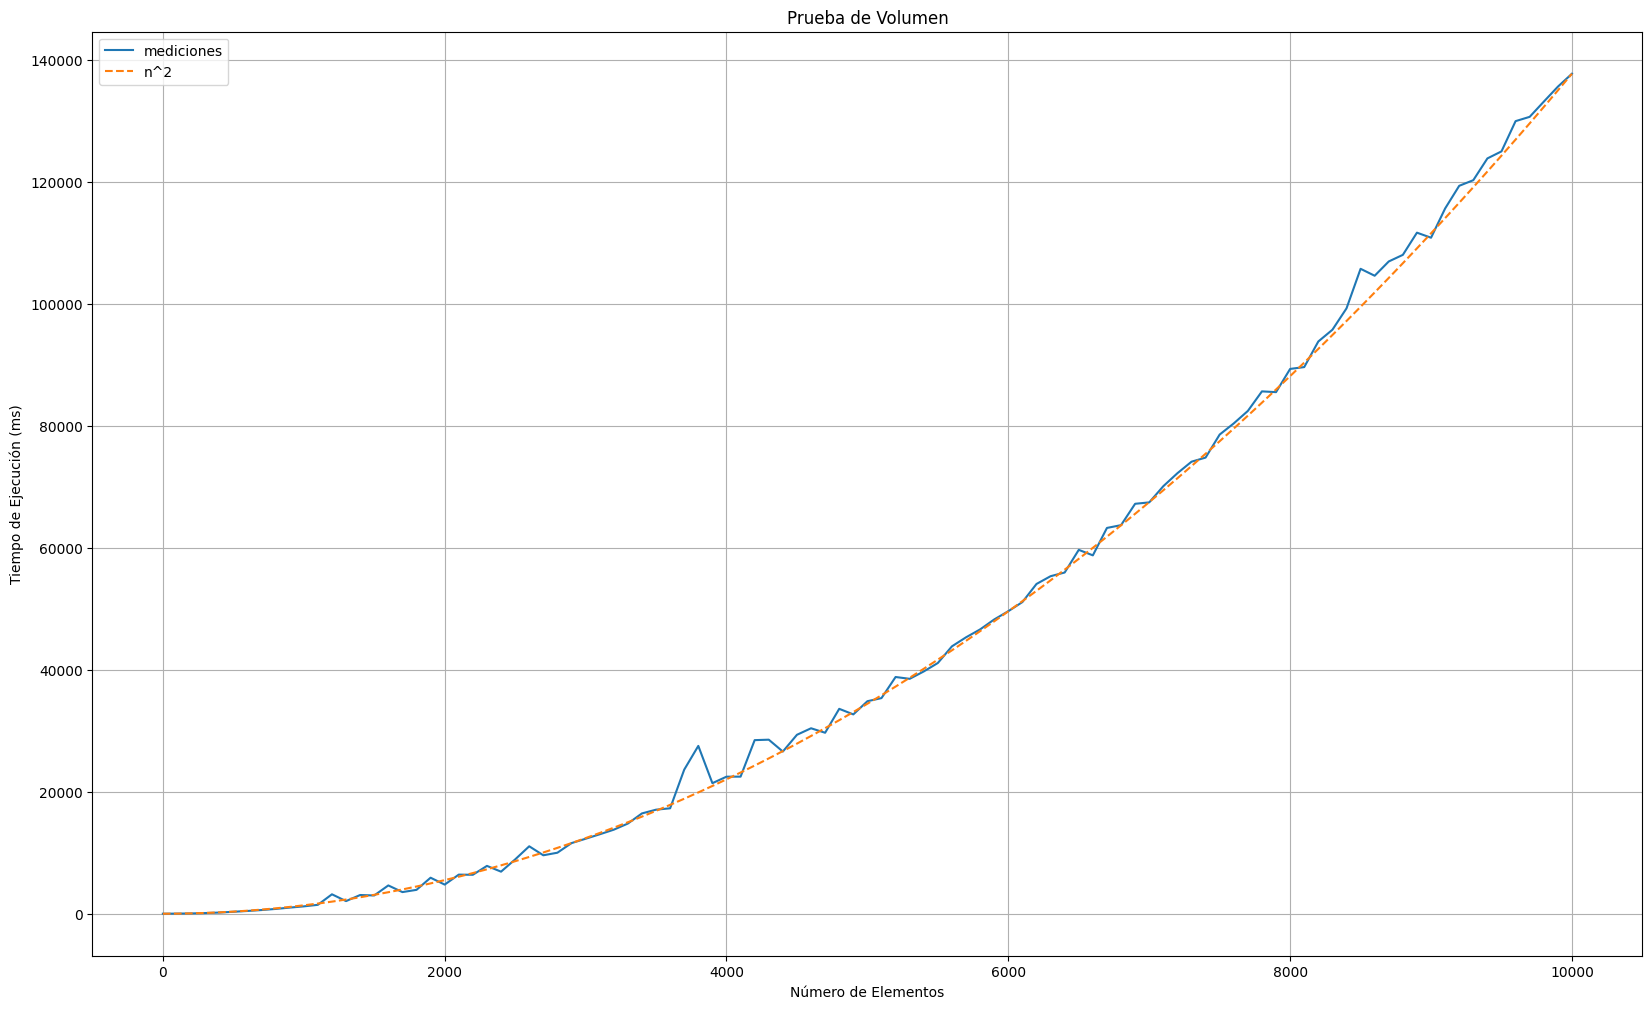

In [ ]:
# Grafica los resultados con n^2
plt.figure(figsize=(20,12))
plt.plot(n_elementos, mediciones, label="mediciones")
plt.plot(n_elementos, n_cuadrado,linestyle='--', label="n^2")
plt.xlabel('Número de Elementos')
plt.ylabel('Tiempo de Ejecución (ms)')
plt.title('Prueba de Volumen')
plt.legend()
plt.grid(True)
plt.show()

# Pruebas de Variabilidad

In [ ]:
# Estructura Topes [(esfuerzos, energias)]
topes = {
    'al_azar': [(100,1000), (100,1000)],
    'esf_mayor': [(500,1000), (100,499)],
    'ener_mayor': [(100,499), (500,1000)]
}

In [ ]:
# N siendo la cantidad de dias a analizar
def generar_dataset_variable(n, caso):
  random.seed()
  variabilidad_esfuerzo, variabilidad_energia = topes[caso][0], topes[caso][1]
  e = [0] + [random.randint(variabilidad_esfuerzo[0], variabilidad_esfuerzo[1]) for _ in range(n)]
  s = [0] + sorted([random.randint(variabilidad_energia[0], variabilidad_energia[1]) for _ in range(n)], reverse=True)
  return (e, s)

In [ ]:
def prueba_variabilidad():
    n_elementos = list(range(0, 2501, 100))

    for n in tqdm(n_elementos):
      for caso_name, caso_results in casos.items():
        entrenamiento = generar_dataset_variable(n, caso_name)
        inicio = time.perf_counter()
        plan_entrenamiento(entrenamiento)
        fin = time.perf_counter()
        tiempo_ejecucion = (fin - inicio) * 1000
        caso_results.append(tiempo_ejecucion)

    return n_elementos

In [ ]:
casos = {}
casos['al_azar'] = []
casos['esf_mayor'] = []
casos['ener_mayor'] = []
n_elementos = prueba_variabilidad()

100%|██████████| 26/26 [03:48<00:00,  8.79s/it]


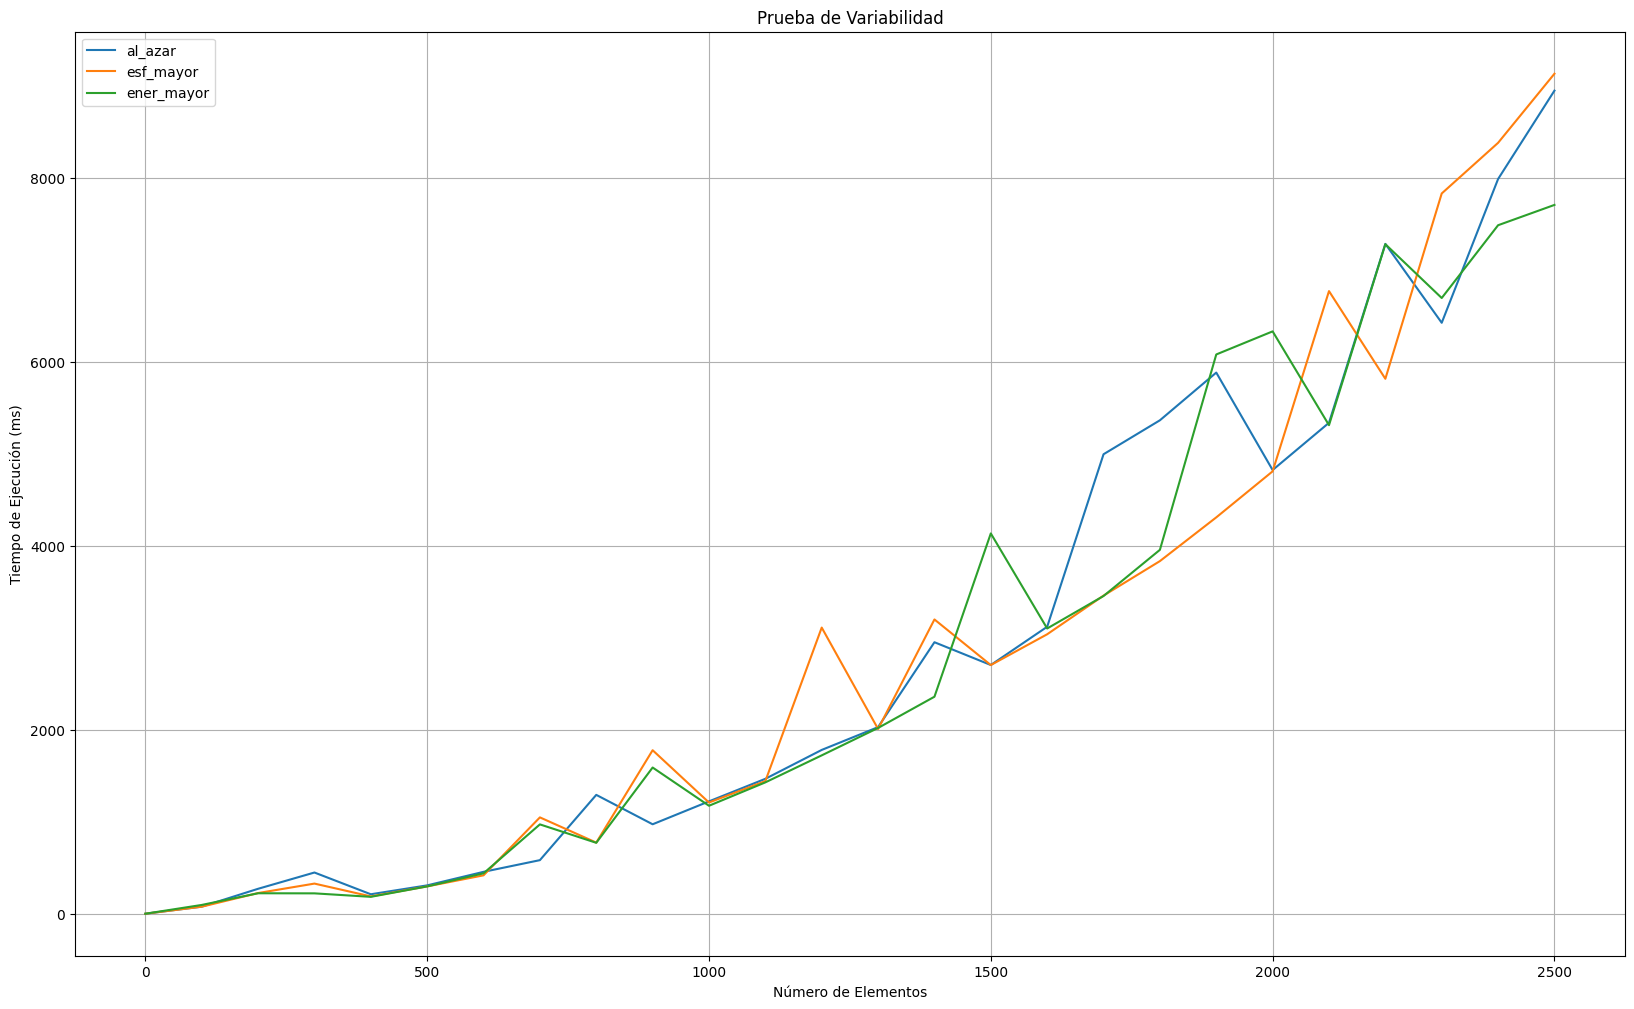

In [ ]:
plt.figure(figsize=(20,12))
for nombre, mediciones in casos.items():
  plt.plot(n_elementos, mediciones, label=nombre)

plt.xlabel('Número de Elementos')
plt.ylabel('Tiempo de Ejecución (ms)')
plt.title('Prueba de Variabilidad')
plt.legend()
plt.grid(True)
plt.show()
